In [1]:
from datetime import date, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as dates

%matplotlib inline

In [2]:
start = date(2020, 1, 22)
end = date.today()


df = pd.DataFrame()
while start <= end:
    try:
        df_day = pd.read_csv(f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{start.month:02d}-{start.day:02d}-{start.year}.csv')
        df_day['Date'] = start
        df = df.append(df_day)
    except FileNotFoundError:
        pass
    start += timedelta(days=1)
    
del df['Last Update']
df.fillna({'Province/State': '', 'Confirmed': 0, 'Deaths': 0, 'Recovered': 0}, inplace=True)

In [3]:
df.tail(5)

,Province/State,Country/Region,Confirmed,Deaths,Recovered,Date,Latitude,Longitude
201,New Mexico,US,0.0,0.0,0.0,2020-03-10,34.8405,-106.2485
202,North Dakota,US,0.0,0.0,0.0,2020-03-10,47.5289,-99.7840
203,South Dakota,US,0.0,0.0,0.0,2020-03-10,44.2998,-99.4388
204,West Virginia,US,0.0,0.0,0.0,2020-03-10,38.4912,-80.9545
205,Wyoming,US,0.0,0.0,0.0,2020-03-10,42.7560,-107.3025


In [4]:
confirmed_by_date = df[df['Country/Region'] == 'US'][['Date', 'Confirmed']].groupby('Date').sum()

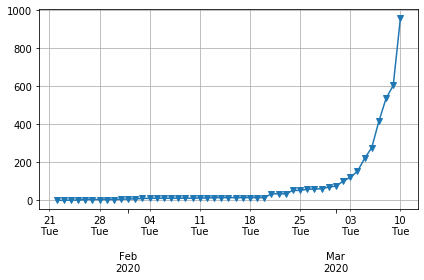

In [5]:
fig, ax = plt.subplots()
ax.plot_date(confirmed_by_date.index, confirmed_by_date, 'v-')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1), interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
plt.tight_layout()